In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv('/kaggle/input/real-estate-price-prediction/Real estate.csv')
df.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [3]:
df.drop('No', axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [5]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
df.isna().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

<Axes: >

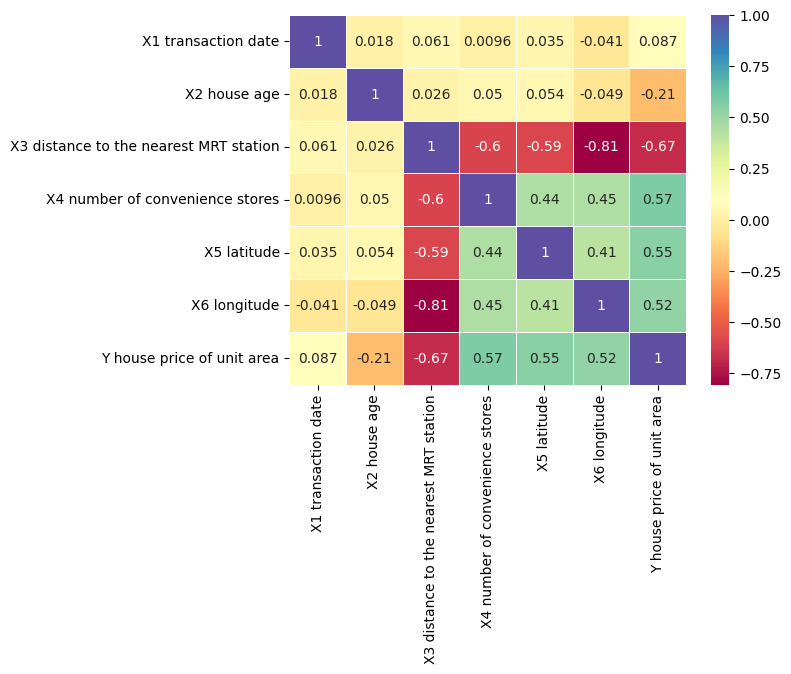

In [7]:
sns.heatmap(df.corr(), cmap = 'Spectral',annot=True,linewidths=0.5)

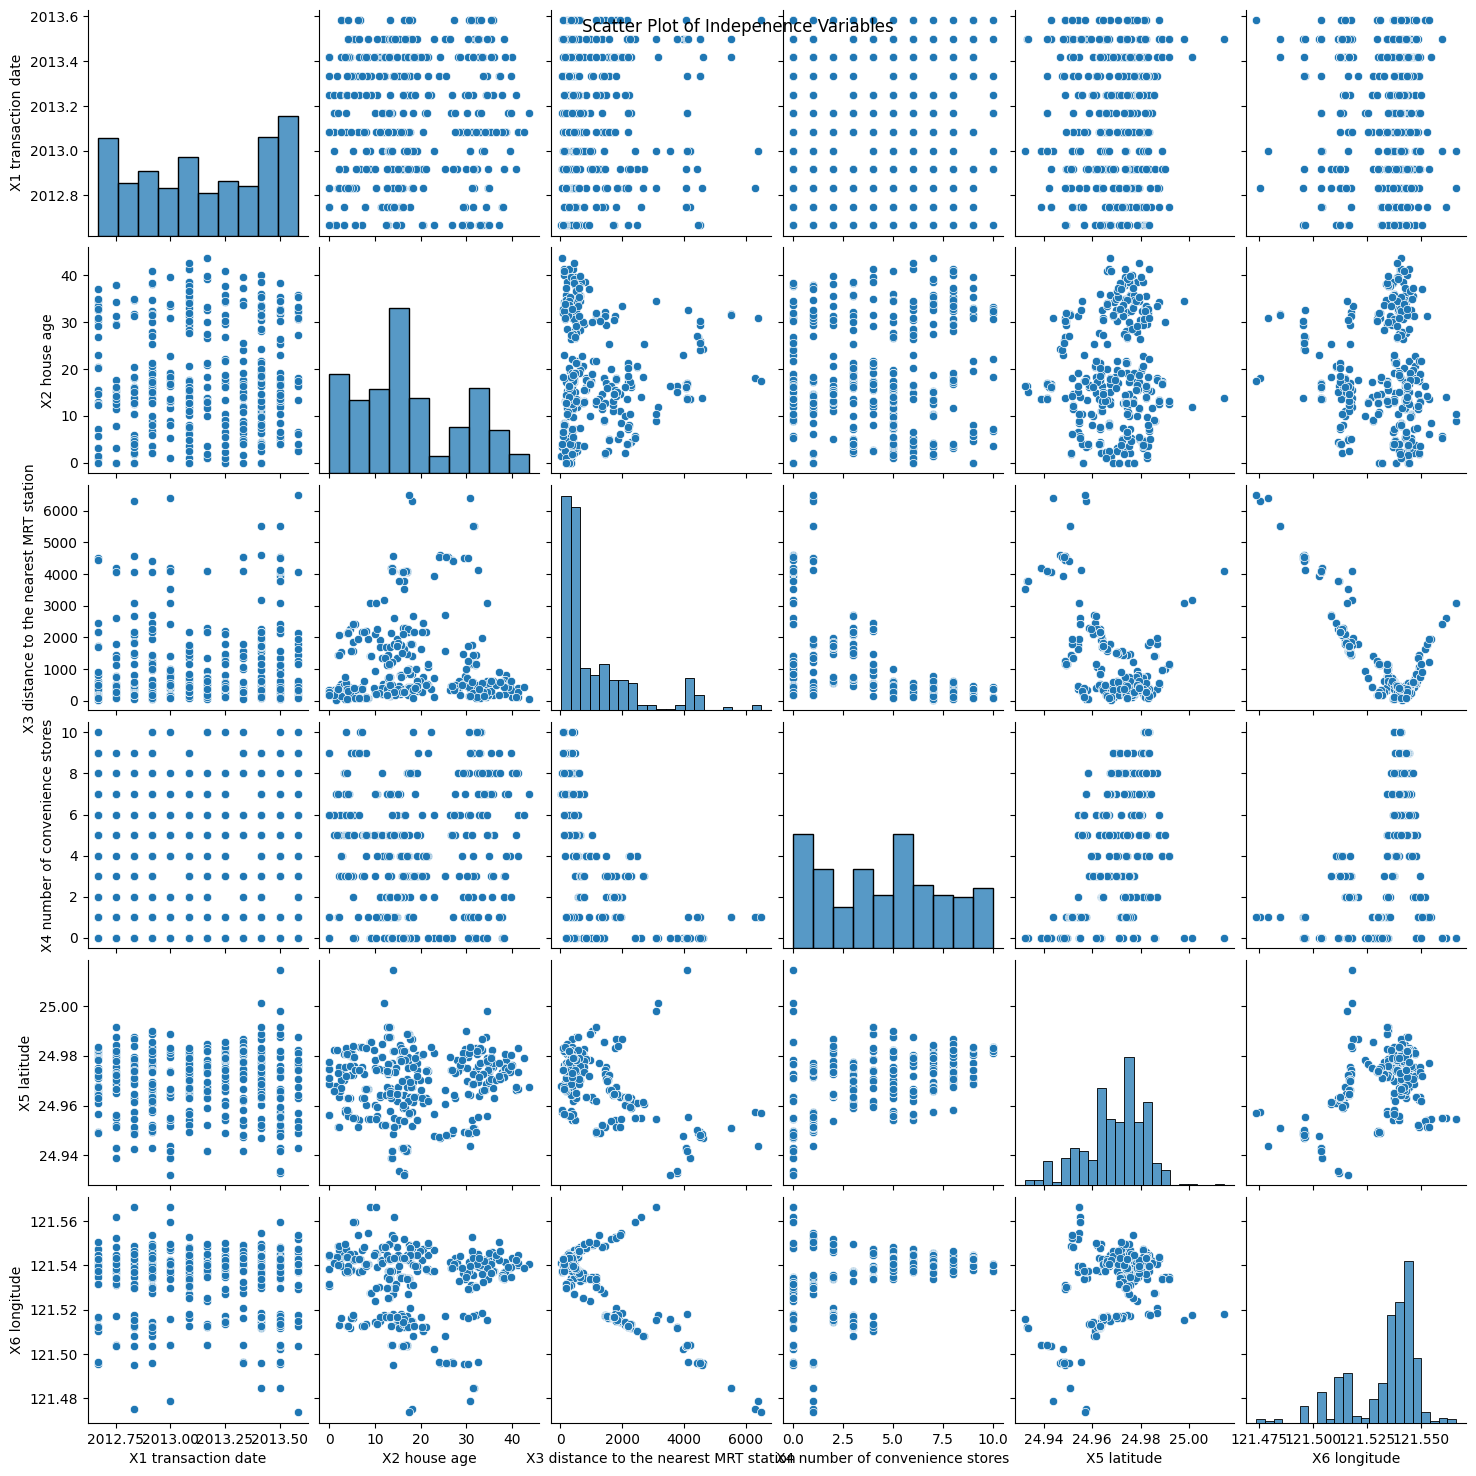

In [8]:
ax = sns.pairplot(df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']], kind = 'scatter')
ax.fig.suptitle('Scatter Plot of Indepenence Variables')
plt.show()

In [9]:
VIF = pd.DataFrame()
VIF["Features"] = df.columns
VIF["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
VIF

,Features,VIF
0,X1 transaction date,4.326076e+07
1,X2 house age,3.888155e+00
2,X3 distance to the nearest MRT station,5.331210e+00
3,X4 number of convenience stores,5.163583e+00
4,X5 latitude,6.508738e+06
5,X6 longitude,4.401142e+07
6,Y house price of unit area,2.086345e+01


<Axes: xlabel='X6 longitude', ylabel='Y house price of unit area'>

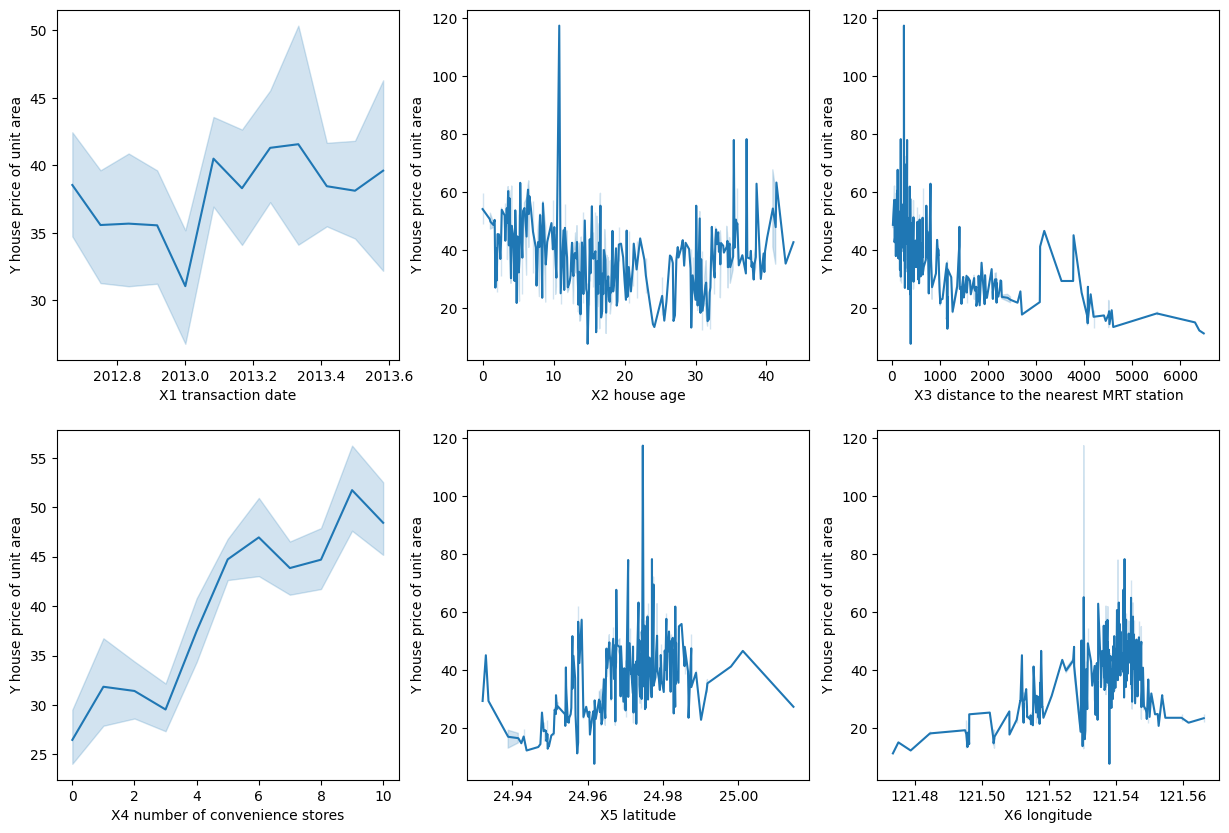

In [10]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
ax = ax.flatten()

sns.lineplot(data=df, x='X1 transaction date', y='Y house price of unit area', ax=ax[0])
sns.lineplot(data=df, x='X2 house age', y='Y house price of unit area', ax=ax[1])
sns.lineplot(data=df, x='X3 distance to the nearest MRT station', y='Y house price of unit area', ax=ax[2])
sns.lineplot(data=df, x='X4 number of convenience stores', y='Y house price of unit area', ax=ax[3])
sns.lineplot(data=df, x='X5 latitude', y='Y house price of unit area', ax=ax[4])
sns.lineplot(data=df, x='X6 longitude', y='Y house price of unit area', ax=ax[5])

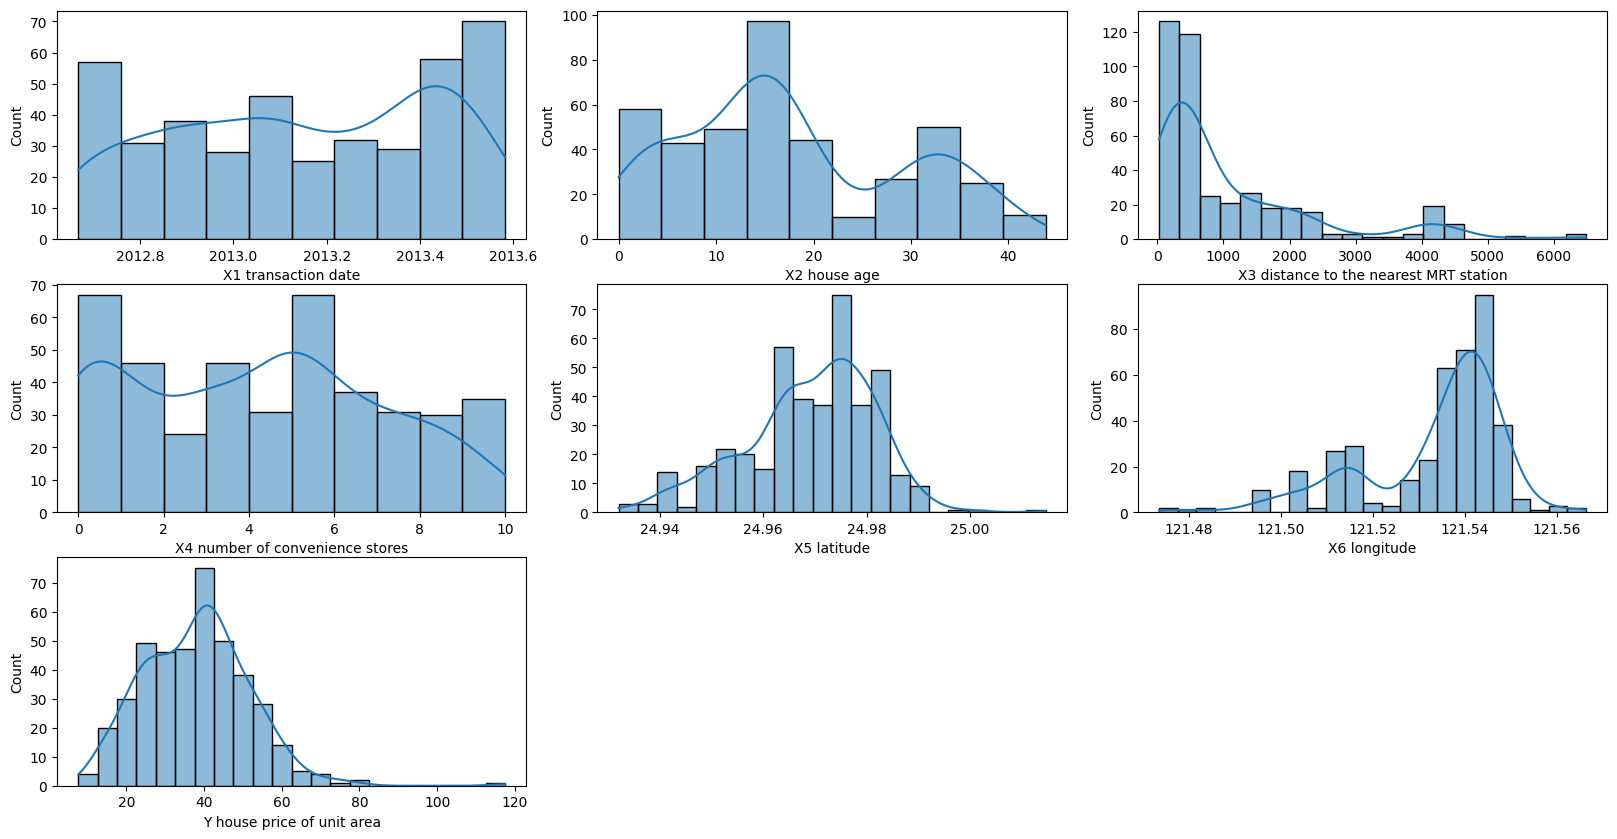

In [11]:
fig = plt.figure(figsize = (16,16))
for index, col in enumerate(df):
    plt.subplot(6,3, index +1)
    sns.histplot(df.loc[:, col], kde = True)
fig.tight_layout(pad = 0.1)

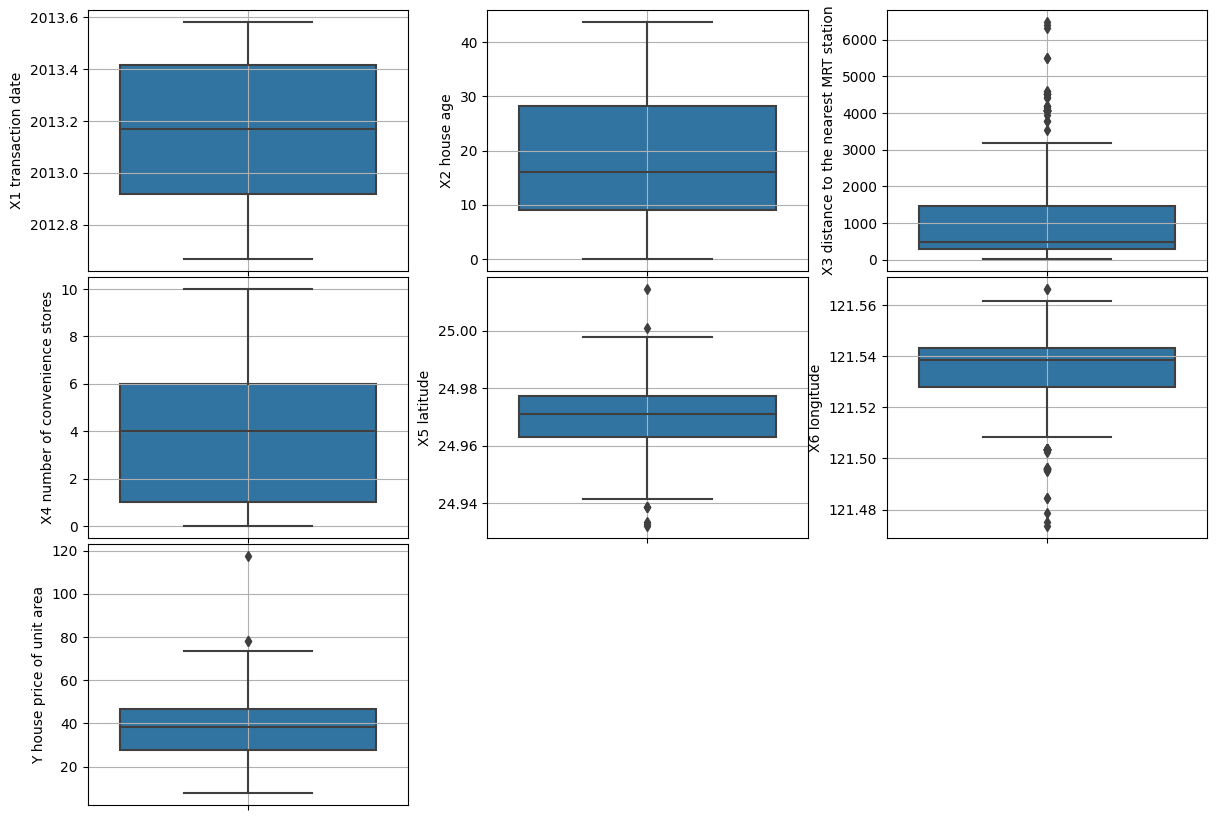

In [12]:
fig = plt.figure(figsize = (12,16))
for index, col in enumerate(df):
    plt.subplot(6,3, index +1)
    sns.boxplot(y = col, data = df)
    plt.grid()
fig.tight_layout(pad = 0.1)

In [13]:
import plotly.express as px

In [14]:
color_scale = [(0,'orange'),(0,'red')]
fig = px.scatter_mapbox(df, lat="X5 latitude", lon="X6 longitude", color="Y house price of unit area", zoom=10, height=500, color_continuous_scale=color_scale)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [15]:
features = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
X = df[features]
y = df['Y house price of unit area']

In [16]:
model = LinearRegression()
model.fit(X, y)
print(f'β0: {model.intercept_}')
print(f'β1: {model.coef_[0]}, β2: {model.coef_[1]}, β3: {model.coef_[2]}, β4: {model.coef_[3]}, β5: {model.coef_[4]}, β6: {model.coef_[5]}')
print(f'R-Squared: {model.score(X, y)} ')

β0: -14437.100802280544
β1: 5.146227462979901, β2: -0.269695447580444, β3: -0.004487461074043575, β4: 1.1332769046491105, β5: 225.4729755631319, β6: -12.423601173340435
R-Squared: 0.5823704472723009 


In [17]:
X_sm = sm.add_constant(X)
est = sm.OLS(y, X_sm)
est2 = est.fit()
print(est2.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.582
Model:                                    OLS   Adj. R-squared:                  0.576
Method:                         Least Squares   F-statistic:                     94.59
Date:                        Mon, 13 Nov 2023   Prob (F-statistic):           4.86e-74
Time:                                14:56:21   Log-Likelihood:                -1487.0
No. Observations:                         414   AIC:                             2988.
Df Residuals:                             407   BIC:                             3016.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [18]:
#Standardization
sc = StandardScaler()
X_std = sc.fit_transform(X)
sc_df = pd.DataFrame(X_std, columns=features)
sc_df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762
1,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139
2,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183
3,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183
4,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937


In [19]:
df.describe().round(2)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.00,414.00,414.00,414.00,414.00,414.00,414.00
mean,2013.15,17.71,1083.89,4.09,24.97,121.53,37.98
std,0.28,11.39,1262.11,2.95,0.01,0.02,13.61
min,2012.67,0.00,23.38,0.00,24.93,121.47,7.60
25%,2012.92,9.02,289.32,1.00,24.96,121.53,27.70
50%,2013.17,16.10,492.23,4.00,24.97,121.54,38.45
75%,2013.42,28.15,1454.28,6.00,24.98,121.54,46.60
max,2013.58,43.80,6488.02,10.00,25.01,121.57,117.50


In [20]:
sc_df.describe().round(2)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,414.00,414.00,414.00,414.00,414.00,414.00
mean,0.00,-0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.71,-1.56,-0.84,-1.39,-2.98,-3.90
25%,-0.82,-0.76,-0.63,-1.05,-0.49,-0.34
50%,0.06,-0.14,-0.47,-0.03,0.17,0.34
75%,0.95,0.92,0.29,0.65,0.68,0.65
max,1.54,2.29,4.29,2.01,3.68,2.15


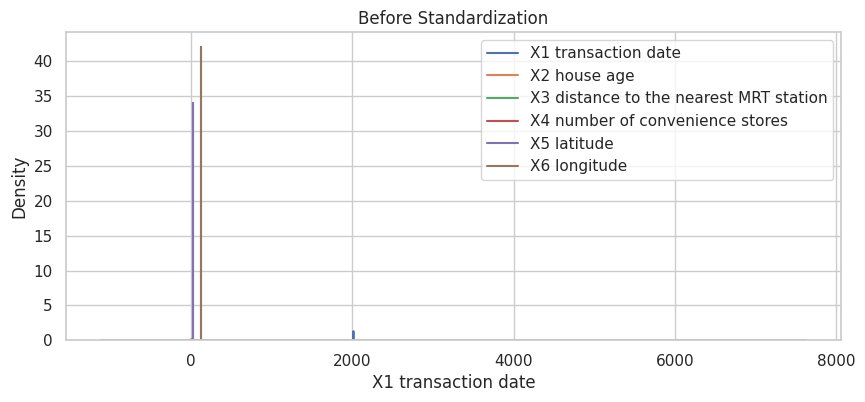

In [21]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(ncols=1, figsize=(10,4))
ax.set_title('Before Standardization')
sns.kdeplot(df['X1 transaction date'], ax = ax,label='X1 transaction date')
sns.kdeplot(df['X2 house age'], ax = ax, label='X2 house age')
sns.kdeplot(df['X3 distance to the nearest MRT station'], ax = ax,label='X3 distance to the nearest MRT station')
sns.kdeplot(df['X4 number of convenience stores'], ax = ax,label='X4 number of convenience stores')
sns.kdeplot(df['X5 latitude'], ax = ax,label='X5 latitude')
sns.kdeplot(df['X6 longitude'], ax = ax,label='X6 longitude')
ax.legend()
plt.show()

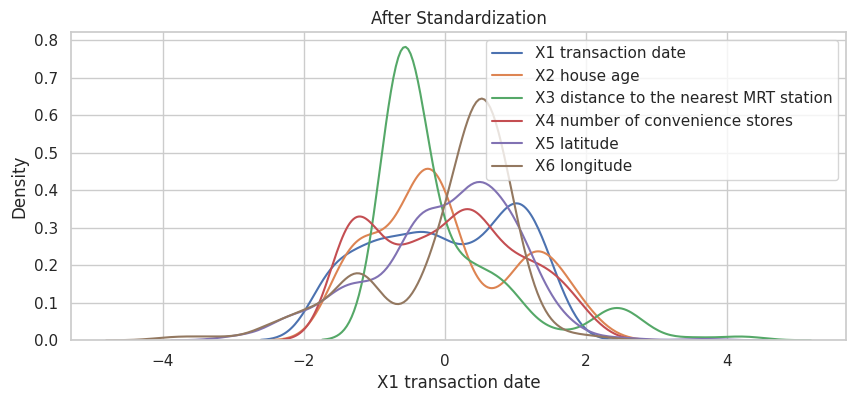

In [22]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(ncols=1, figsize=(10,4))
ax.set_title('After Standardization')
sns.kdeplot(sc_df['X1 transaction date'], ax = ax,label='X1 transaction date')
sns.kdeplot(sc_df['X2 house age'], ax = ax, label='X2 house age')
sns.kdeplot(sc_df['X3 distance to the nearest MRT station'], ax = ax, label='X3 distance to the nearest MRT station')
sns.kdeplot(sc_df['X4 number of convenience stores'], ax = ax, label='X4 number of convenience stores')
sns.kdeplot(sc_df['X5 latitude'], ax = ax, label='X5 latitude')
sns.kdeplot(sc_df['X6 longitude'], ax = ax,label='X6 longitude')
ax.legend()
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((351, 6), (63, 6), (351,), (63,))

In [24]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [25]:
model = LinearRegression()
model.fit(X_train_std, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test_std)

In [27]:
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
prediction

,Actual,Predicted
356,45.3,39.633449
170,14.4,12.781255
224,46.0,42.192237
331,15.6,12.592675
306,50.2,41.765243
...,...,...
235,39.3,43.880456
259,28.8,32.541890
190,42.3,44.253069
65,44.3,44.033637


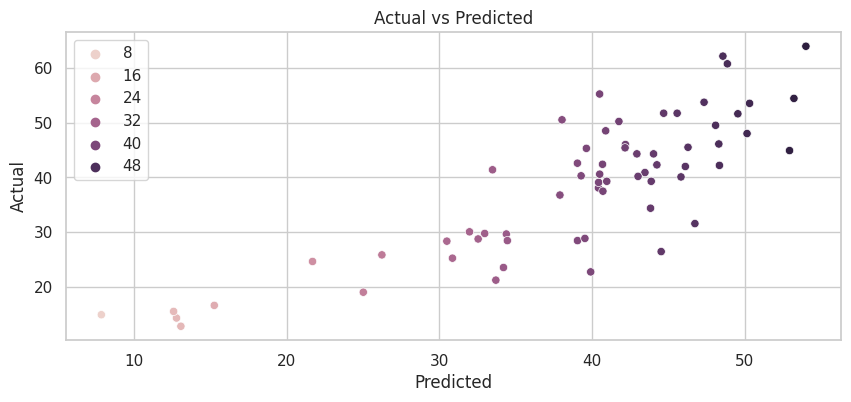

In [28]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(ncols=1, figsize=(10,4))
ax.set_title('Actual vs Predicted')
sns.scatterplot(x = np.ravel(y_pred), y = y_test, ax = ax, hue = np.ravel(y_pred))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
mse = mean_squared_error(y_test, y_pred)
mas = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mas}')
print(f'R2: {r2}')

MSE: 48.94384319291605
MAE: 5.3768943250688075
R2: 0.6800088002014192


In [30]:
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)
print(f'Mean of Residuals: {mean_residuals}')

Mean of Residuals: -0.5975753402119096


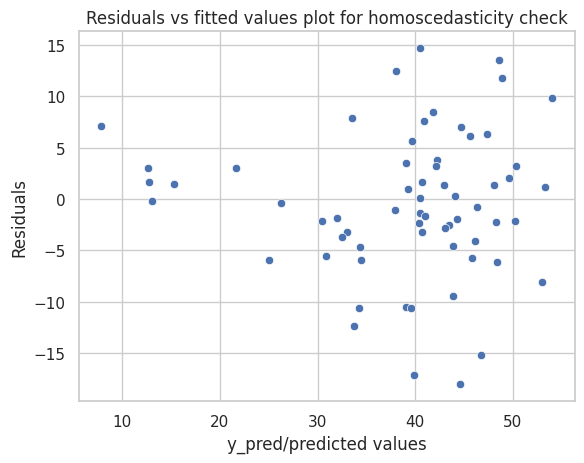

In [31]:
p = sns.scatterplot( x = y_pred, y = residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
#plt.ylim(-15,15)
#plt.xlim(0,50)
#p = sns.lineplot( x = [0,25], y = [0,0], color = 'Red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')